In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.colheader_justify', 'center')

In [144]:
def load_data(path : str )-> pd.DataFrame:
    return pd.read_csv(PATH, engine='pyarrow', dtype_backend='pyarrow')
PATH = "job_data_merged_1.csv"
data = load_data(PATH)
data.head()

,,CT,place,Location,City,T
0,0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,4,Business Analyst,Remote,United Kingdom,Operations,Full time


In [145]:
def change_name_column(df:pd.DataFrame)->pd.DataFrame:
    return df.rename(columns={
        "":'',
        'CT':'Category',
        'place':'Workplace',
        'City':'Department',
        'T': 'Type'
    })

In [146]:
def change_data_type(df: pd.DataFrame) -> pd.DataFrame:
    return df.astype({
        'Category':'category',
        'Workplace':'category',
        'Type':'category',
        'Department':'category',
        'Location':'category'
    })

In [147]:
# Preprocess the data
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(df.columns[0], axis=1)
    df = change_name_column(df)
    df = change_data_type(df)
    df = df.drop_duplicates()
    return df.reset_index(drop=True)


data = preprocess_data(data.copy())

In [148]:
data.head()

,Category,Workplace,Location,Department,Type
0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,Business Analyst,Remote,"London, England, United Kingdom",Change & Innovation,<NA>


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Category    672 non-null    category
 1   Workplace   648 non-null    category
 2   Location    644 non-null    category
 3   Department  575 non-null    category
 4   Type        576 non-null    category
dtypes: category(5)
memory usage: 36.3 KB


In [150]:
#counting the missing value in each column.
print(data.isna().sum())

Category       0
Workplace     24
Location      28
Department    97
Type          96
dtype: int64


In [151]:
data=data.dropna()
print(data.isna().sum())
print(len(data))
data.head()

Category      0
Workplace     0
Location      0
Department    0
Type          0
dtype: int64
483


,Category,Workplace,Location,Department,Type
0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
5,Business Analyst,On-site,"Islamabad, Islamabad Capital Territory, Pakistan","Data & Strategy, Performance Analytics",Full time


In [152]:

unique_Cate=data['Category'].unique().tolist()
unique_Cate

['Business Analyst',
 'Cloud',
 'Data Scientist',
 'HR',
 'Software Developer',
 'UI/UX']

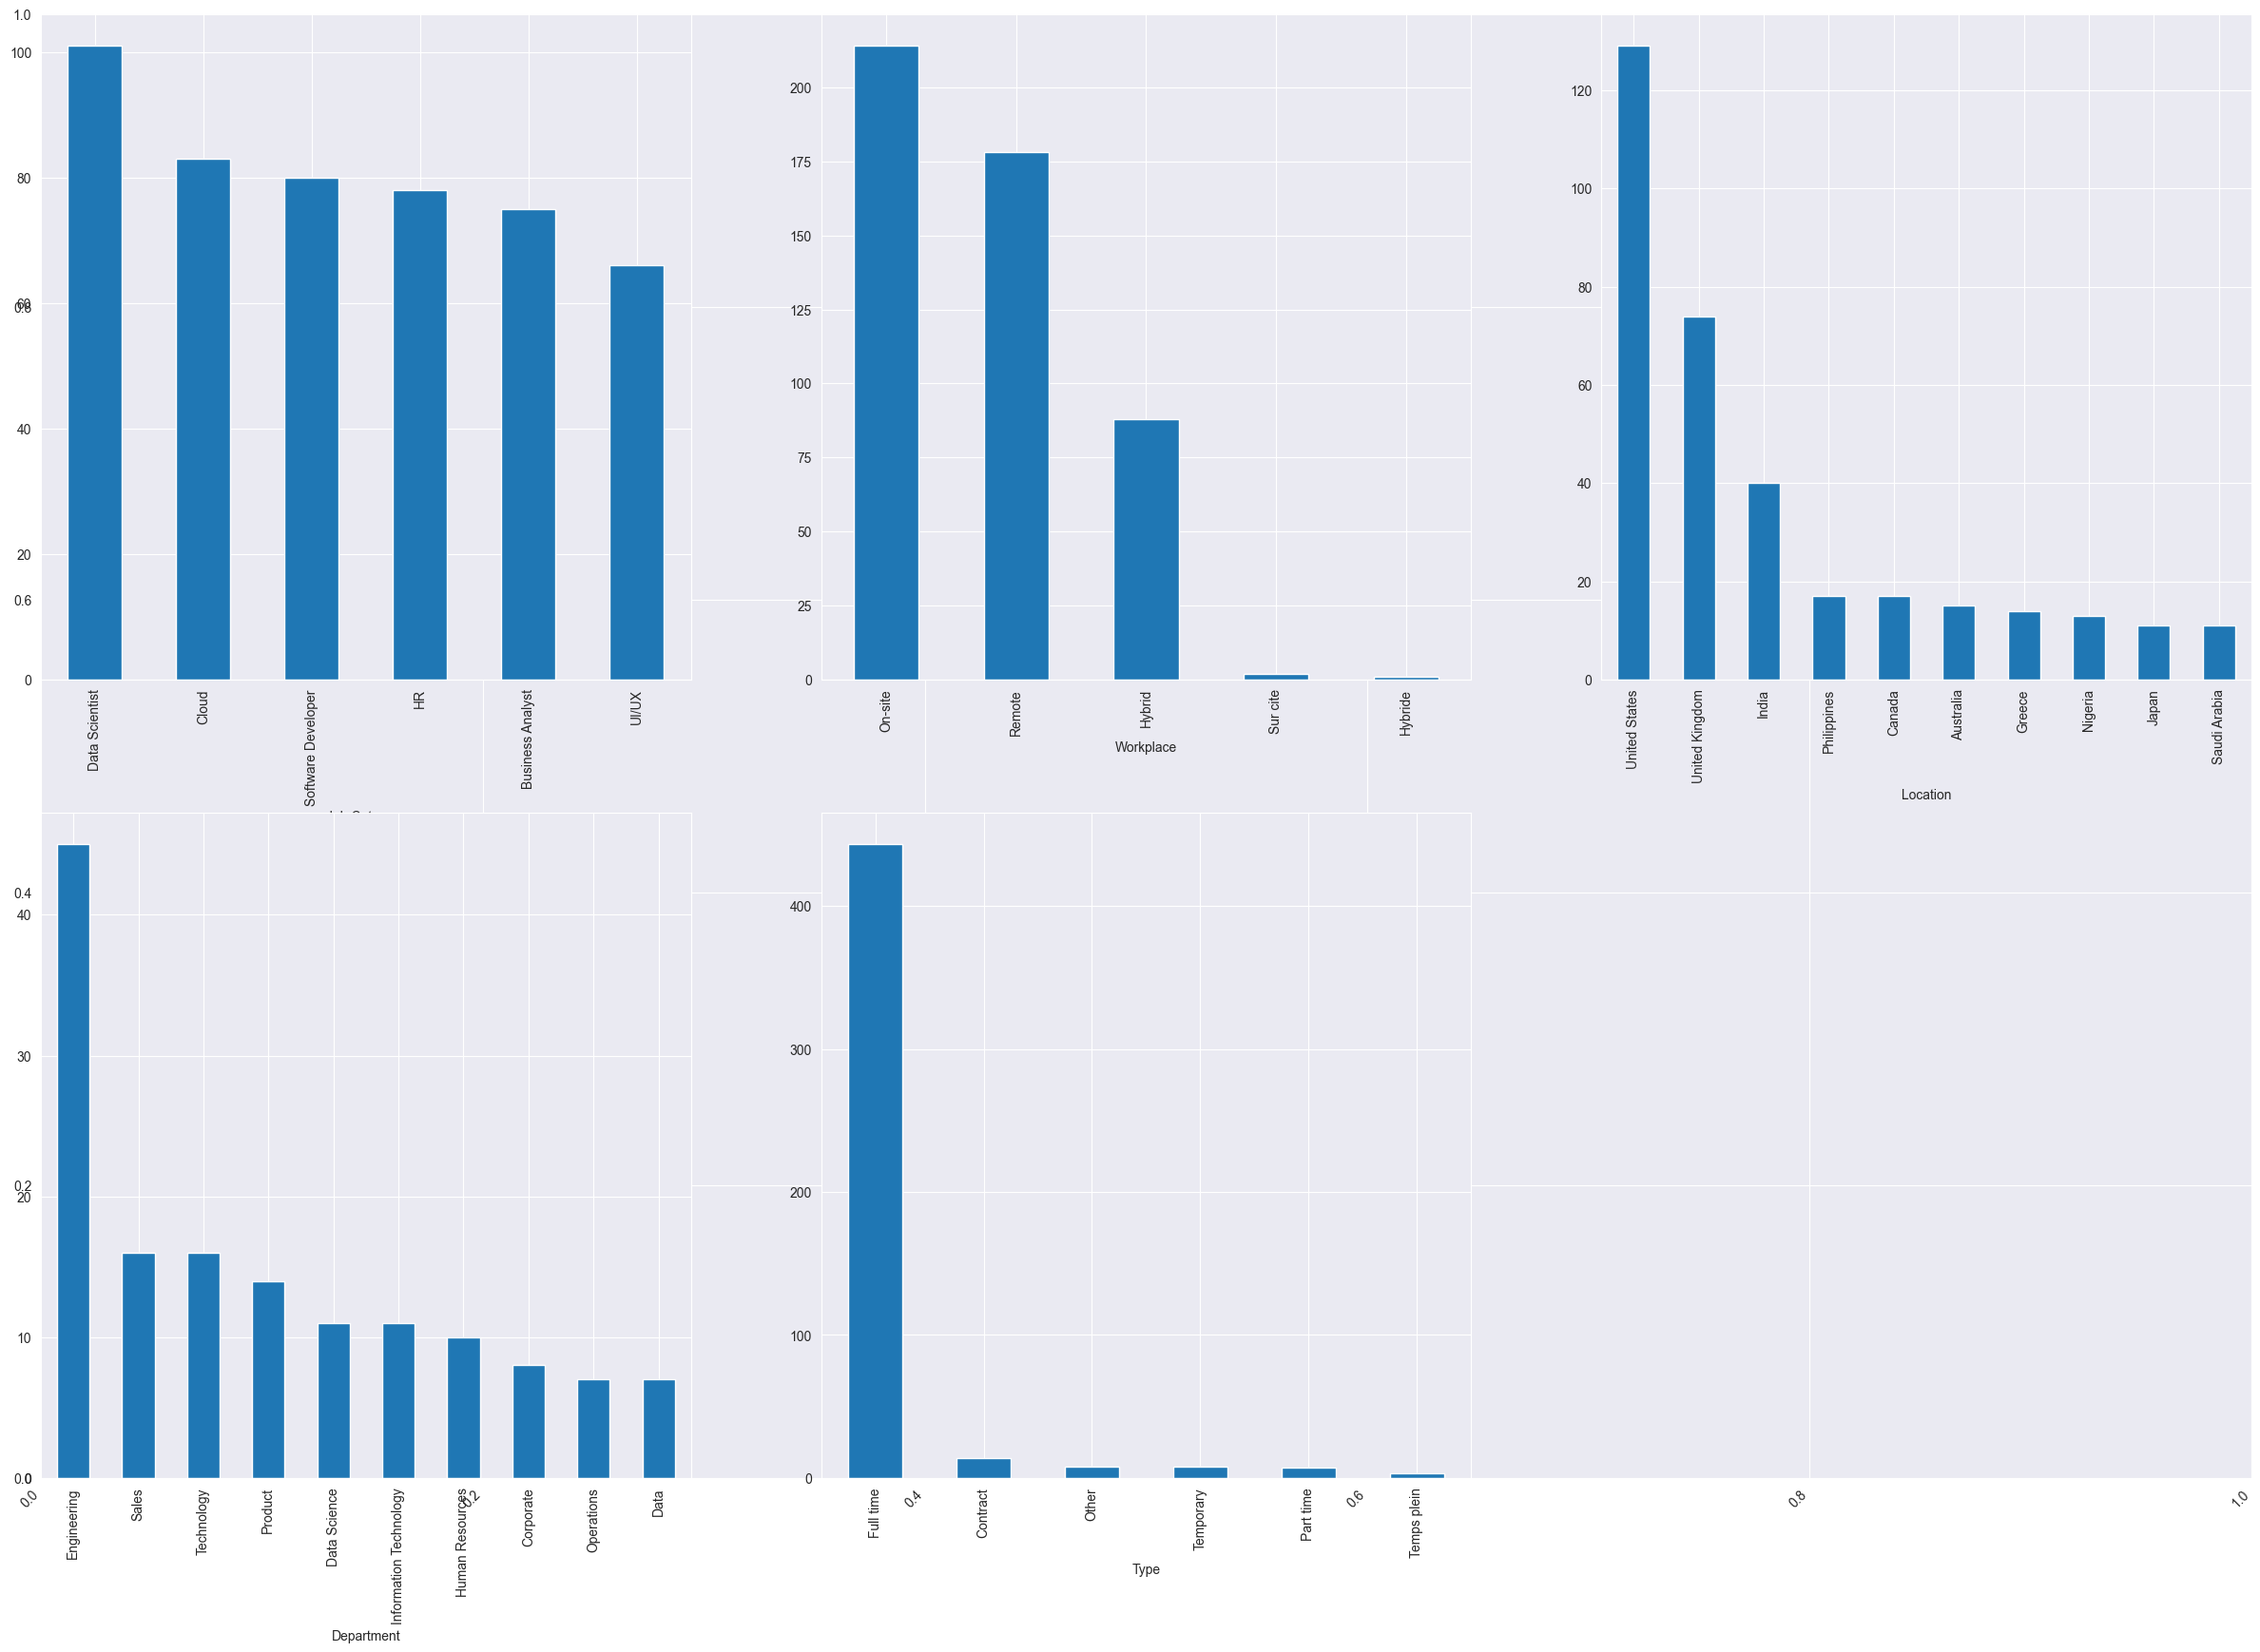

In [153]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=45, ha='right')

plt.subplot(2,3,1)
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Job Category')


plt.subplot(2,3,2)
data['Workplace'].value_counts().plot(kind='bar')
plt.xlabel('Workplace')

plt.subplot(2,3,3)
data['Country'] = data['Location'].str.split(',').str[-1].str.strip()
data['Country'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Location')

plt.subplot(2,3,4)
data['Department'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Department')

plt.subplot(2,3,5)
data['Type'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Type')

plt.show()

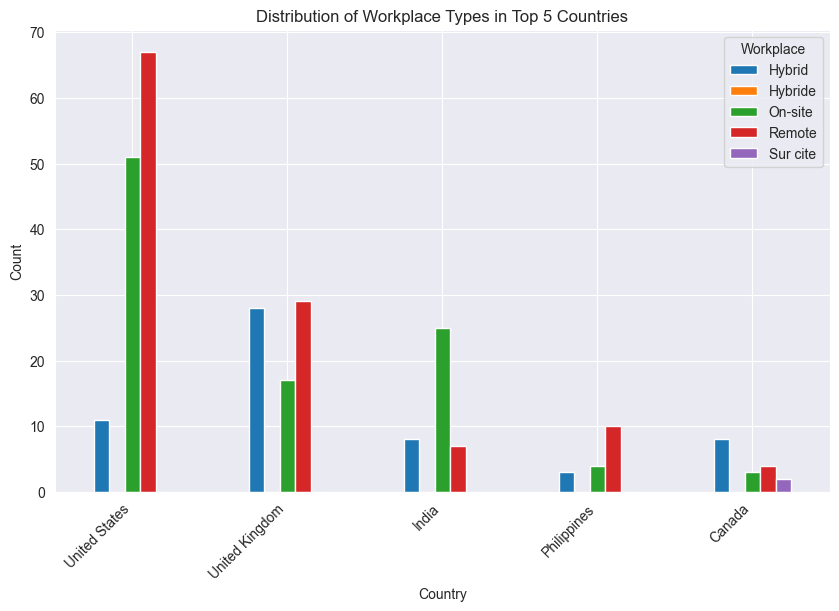

In [154]:
grouped_data = data.groupby(['Country', 'Workplace']).size().unstack()

# Get the top 5 countries based on the total count
top_countries = data['Country'].value_counts().head(5).index

# Filter the grouped data for the top 5 countries
top_countries_data = grouped_data.loc[top_countries]

# Plot the bar chart
ax = top_countries_data.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Workplace Types in Top 5 Countries')
plt.legend(title='Workplace')
plt.show()

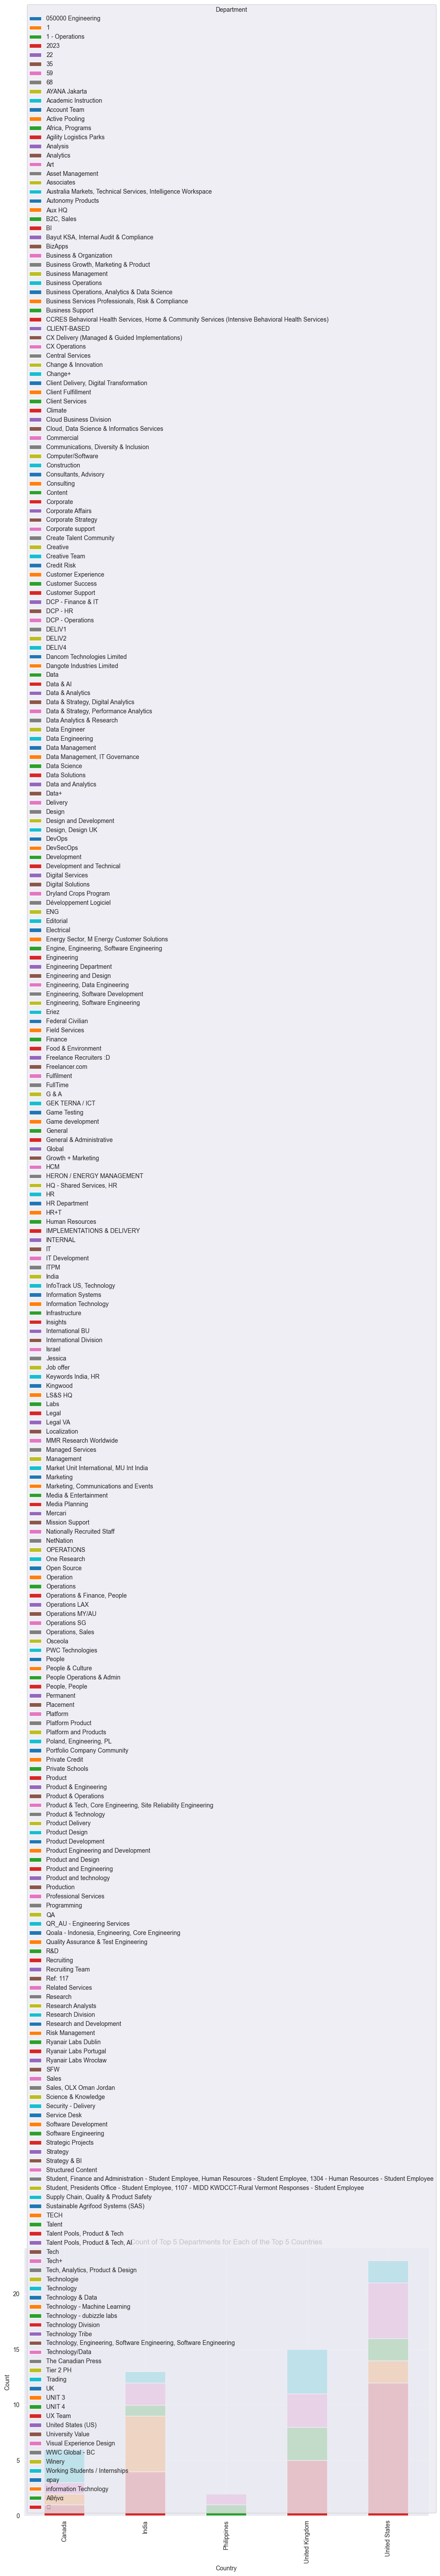

In [157]:
# Get the top 5 countries based on the count of each country's name
top_countries = data['Country'].value_counts().head(5).index

# Filter the DataFrame for the top 5 countries
filtered_data = data[data['Country'].isin(top_countries)]

# Get the top 5 departments based on the total count
top_departments = filtered_data['Department'].value_counts().head(5).index

# Filter the DataFrame for the top 5 departments
filtered_data = filtered_data[filtered_data['Department'].isin(top_departments)]

# Group by 'country' and 'department', then count the occurrences
grouped_data = filtered_data.groupby(['Country', 'Department']).size().unstack()

# Plot the bar chart within a bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Top 5 Departments for Each of the Top 5 Countries')
plt.legend(title='Department')
plt.show()